<a href="https://colab.research.google.com/github/Shaheer2812/JavaScript30/blob/master/25100051_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PA1: K-Nearest Neighbors

<center>
    <img src="./assets/nn-k1.png">
</center>

### Introduction

In this assignment, you will be creating your first Machine Learning model from scratch: K-Nearest Neighbors.

This algorithm is one of the simpler ones you will come across, but the ideas can be applied to large-scale sophisticated systems: Semantic Search and Recommendation Systems for starters.

For this assignment, you will be creating your own KNN-classifier from scratch using `numpy`. You can then use this to classify images of _handwritten digits_ from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). This is the "Hello World" of Machine Learning.

After this notebook you should be able to:

- Utilize `numpy` to implement a simple KNN classifier from scratch

- Understand how to setup a good Cross Validation strategy

- Be able to setup simple classification tasks

### Instructions

- Follow along with the notebook, filling out the necessary code where instructed.

- <span style="color: red;">Read the Submission Instructions and Plagiarism Policy in the attached PDF.</span>

- <span style="color: red;">Make sure to run all cells for credit.</span>

- <span style="color: red;">Do not remove any pre-written code.</span> We will be using the `print` statements to grade your assignment.

- <span style="color: red;">You must attempt all parts.</span> Do not assume that because something is for 0 marks, you can leave it - it will definitely be used in later parts.

- <span style="color: red;">Do not use unauthorized libraries.</span> You are not allowed to use `sklearn` in Part 1. Failure to follow these instructions will result in a serious penalty.


## Part 1: KNNs from Scratch [75 marks]

Again, you are <span style="color: red;">not allowed</span> to use scikit-learn or any other machine learning toolkit for this part. You have to implement your own k-NN classifier from scratch.

You can use `numpy`, `pandas`, `seaborn`, `matplotlib`, `PIL`, and the standard Python libraries for this part. Contact the TAs if you want to use any other libraries.

### Importing Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import PIL
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the dataset

<center>
    <img src="./assets/mnist.png">
</center>

The MNIST dataset consists of 70,000 labeled images of handwritten digits, each of size 28 pixels by 28 pixels.

The dataset given to you is in a CSV file, `mnist.csv`. The CSV file has ~70,000 rows and 785 columns. You can download it using [this link](https://drive.google.com/file/d/16STvH3jEk-JF1BGAguhnA9y0sT_c_MC-/view?usp=sharing).

- Each row represents one image of a handwritten digit. Note that the header row contains the column names.

- The first column gives the label (a number from 0 to 9). The next 784 columns give the value of each pixel. There are 784 pixels in each image corresponding to an image size of 28 by 28.

For faster prototyping, you can sample 20% of the entire dataset.

You can use the `pandas` library to load the CSV file but the final dataset should be stored in a `numpy` array of shape (14000, 785).


In [ ]:
## (3 marks)

file_path = '/content/drive/My Drive/mnist.csv'
df = pd.read_csv(file_path, header=1)
# df.drop(df.index[0])
arr = df.to_numpy()
# arr = arr.astype(int)

# print(f"shape : {arr.shape}")


# TODO: Print the shapes
print(f"Shape : {arr.shape}")


# TODO: Display the first 5 rows of the dataset
df.head(5)

Shape : (70000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# (2 marks)
# TODO: Sample 20% of the dataset (Make sure this is a random sample!)
# Please note that this is not the train-test split. This is just a sample of the dataset. We are doing this to reduce the computation time.
sampled = df.sample(n=14000, random_state=22)
arr = np.array(sampled)
# new = np.delete(arr, 0, axis=1)
print(arr[0][0])

6


### Displaying Images

Now that you've loaded the dataset, let's display some images.

You can reshape these 784 values for each image, into a `28x28` array, then use either `matplotlib` or `PIL` to display the image.


In [ ]:
# TODO: Implement a display_image function (3 marks)

iterations = 1


def display_image(arr):
    """
    Takes a 1D numpy array, reshapes to a 28x28 array and displays the image
    """
    # print(arr)
    # print(len(arr))
    new = np.delete(arr, 0)
    # print(len(new))
    new = new.reshape(28, 28)
    # print(new.shape)
    # print(new)
    # print(f"this number is : {arr[0]}")
    plt.subplot(1, 5, iterations)
    plt.axis("off")
    plt.imshow(new)

4
6
8
1
7


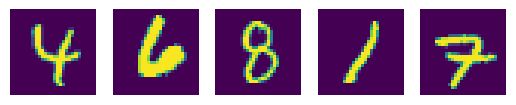

In [ ]:
# TODO: Randomly pick and display 5 images from the dataset

## Code here

# pick a random row
for _ in range(5):
    random_index = np.random.randint(0, len(arr))
    random_img = arr[random_index, :]
    print(arr[random_index, 0])
    display_image(random_img)
    iterations += 1

### Train-Test split

With the data loaded, you should set up a proper Cross Validation scheme for your modeling experiments, before you actually start building your model.

Divide the dataset into training and test sets (around an 85-15 split). More precisely, take the first 11900 images for the training set and the last 2100 for the test set.

Both the resulting splits/sets should be stored in `numpy` arrays of shape `(num_split_images, 785)`. Depending on your approach, you can also separate the labels into a different array (or two arrays)


In [ ]:
## (3 marks)
# TODO: Create a train-test split (2 marks)
labels = arr[:, 0]
# print((labels.shape))

data_train = arr[:11900, :]
data_test = arr[11900:, :]
print(data_train[0][0])


# TODO:Print the shapes of both arrays (1 mark)
print(f"Shape data_train : {data_train.shape}\nShape data_test : {data_test.shape}")
# print(labels.shape)

6
Shape data_train : (11900, 785)
Shape data_test : (2100, 785)


In [ ]:
## (3 marks)
# TODO: Split the train and test into inputs and labels (2 marks)
input_train = data_train[:, 1:]
input_test = data_test[:, 1:]

label_train = labels[:11900]
label_test = labels[11900:]

# TODO: Print the shapes of the 4 arrays (1 mark)
print(
    f"input_train: {input_train.shape}\ninput_test: {input_test.shape}\nlabel_train: {label_train.shape}\nlabel_test: {label_test.shape}"
)

input_train: (11900, 784)
input_test: (2100, 784)
label_train: (11900,)
label_test: (2100,)


### Implementing k-NN Classifier

#### Instructions

Now you can create your own k-NN classifier. You can use the following steps as a guide:

1. For a test data point, find its distance from all training instances.

2. Sort the calculated distances in ascending order based on distance values.

3. Choose k training samples with minimum distances from the test data point.

4. Return the _most frequent_ class of these samples.

**Note:** Your function should work with _Euclidean_ distance as well as _Manhattan_ distance. Pass the distance metric as a parameter in the k-NN classifier function. Your function should also let one specify the value of `k`.

For values of `k` where a tie occurs, you need to break the tie by backing off to the `k-1` value. In case there is still a tie, you will continue decreasing `k` until there is a clear winner.

#### Distance functions

First, implement separate functions for the Euclidean and Manhattan distances. Formulas for both are given below.

$$
d_{\text{Euclidean}}(\vec{p},\vec{q}) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + (p_3 - q_3)^2 + ... + (p_n - q_n)^2}
$$

$$
d_{\text{Manhattan}}(\vec{p},\vec{q}) = |(p_1 - q_1)| + |(p_2 - q_2)| + |(p_3 - q_3)| + ... + |(p_n - q_n)|
$$


In [ ]:
def euclidean_distance(vector1, vector2):
    # TODO:Implement the euclidean distance function (2 marks)

    t = vector1 - vector2
    ans = np.sqrt(np.dot(t.T, t))
    return ans


def manhattan_distance(vector1, vector2):
    # TODO:Implement Euclidean and Manhattan distance functions (2 marks)
    ans = np.sum(np.abs(vector1 - vector2))
    return ans


#########################

#### k-NN Classifier methods

Complete the following method functions:

1. `fit`

2. `get_neighbours`

3. `predict`

You can make as many helper functions as you need.


In [ ]:
import numpy as np

class kNearestNeighbours:
	def __init__(self, num_neibrs):
		### DO NOT EDIT !! ###
		"""
		n_neighbours: value of k
		X: array of training data points
		y: array of gold labels for training points
		"""

		self.n_neighbors = num_neibrs
		self.X = None
		self.y = None

	#######################
	#data and its labels passed
	def fit(self, X_train, y_train):
		"""
		Fit the training data to the model
		"""

		# TODO: Set both attributes (1 mark)

		#x_train has 784 col, y_train are the labels
		self.X = X_train
		self.y = y_train


	def get_neighbors(self, x, distanceFunction):
		"""
		Return the k nearest neighbours of the input data point x.
		Hint: you can even just return the indices of the data points

		"""
		# TODO: Complete the get_neighbors function (4 marks)
		ans = []
		for i in range(0, len(self.X)):
			temp = self.X[i, :]

			# #if the same point used
			# if np.array_equal(x, temp):
			# 	continue

			d = distanceFunction(x, temp)
			ans.append((d, i))

		ans.sort()

		#choosing the k nearest points
		slice_ans = ans[0:self.n_neighbors]
		indices = []
		for i in range(0, self.n_neighbors):
			temp = slice_ans[i]
			temp = temp[1]
			#the k nearest indices
			indices.append(temp)

		return indices

	def predict(self, X_test, distanceFunction):
		"""
		Returns an array of predicted labels for all points in the X_test array

		Parameters
		----------
		X_test : array
						The test data

		distanceFunction : function
						The distance function to be used
		"""
		# TODO: Complete the predict function (5 marks)
		ans_arr = []

		for i in range(0, len(X_test)):
			#getting k narest neighbours for every point in the test data
			indices = self.get_neighbors(X_test[i], distanceFunction)
			flag = True

			k = self.n_neighbors
			#run the loop as long as there is no tie
			while flag:

				#stores the closest n neighbours
				max_count = [-1, -1]

				# the closest k labels
				temp_list = []
				# count = []
				for j in range(0, k):
					temp_list.append(self.y[indices[j]])

				# sorts according to the digit that appears tthe most
				for j in range(0, 10):

					#temp stores the no of times j appears
					temp = temp_list.count(j)
					if temp == max_count[0]:
						flag = True

					elif temp > max_count[0]:
						flag = False

						#the no of times j appears
						max_count[0] = temp
						#what the digit is
						max_count[1] = j

				if flag:
					k -= 1

				elif not flag:
					ans_arr.append(max_count[1])

		#the k nearest neighbur for every index
		return ans_arr


		# return ???

Optional Challenge:

Using for loops can be really slow so in order to improve performance we can leverage the power of vectorization. Try vectorizing the process of finding the distance from a query point to each point in the dataset.


#### Evaluation

Now that you've created a model and "trained" it, you can move on to the Evaluation phase.

- Implement an `evaluate` function that computes the Confusion Matrix, Accuracy, and Macro-Average F1 score of your classifier.
- The function should take as input the predicted labels and the true labels. This will be built in steps: its easier to create a Confusion Matrix, then calculate things like the Precision, Recall and F1 from it.

- We will also implement a function that displays our confusion matrix as a heatmap annotated with the data values.
- The axes should be properly labelled and the colormap used needs to be shown next to the heatmap.
- You can have a look at some examples of heatmaps [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html). (You don't have to use the seaborn libray, but it has some pretty colour palettes to choose from.)

We recommend that you do not use hard coding in this function.


In [ ]:
def calculate_accuracy(predicted_labels, true_labels):
    '''
    Returns the accuracy of the predictions against the true labels

    Parameters
    ----------
    predicted_labels : array

    true_labels : array
    """
    '''
    total = len(predicted_labels)
    correct = 0

    for i in range(0, total):
        if predicted_labels[i] == true_labels[i]:
            correct += 1

    accuracy = (correct / total) * 100
    return accuracy
    # TODO: Implement a function to calculate accuracy (2 marks)


classifier = kNearestNeighbours(5)
classifier.fit(input_train, label_train)
test = input_test[:100, :]
ans = classifier.predict(test, euclidean_distance)
test_label = label_test[:300]
a = calculate_accuracy(ans,test_label)
print(a)

96.0


In [ ]:

# print(a)
def make_confusion_matrix(predicted_labels, true_labels):
    '''
    Computes the confusion matrix as a 2D array
    '''

    matrix = np.zeros((10,10))
    for i in range(0, len(predicted_labels)):
        prediced = int(predicted_labels[i])
        true = int(true_labels[i])
        matrix[prediced][true] += 1

    return matrix


    # TODO: Implement a function to compute the confusion matrix (2 marks)



In [ ]:
def make_heat_map(data, title):
    """
    Creates a heatmap from the 2D matrix input
    """
    sns.heatmap(data=data, annot=True)
    plt.title(title)
    plt.show()
    # TODO: Implement a funtion to display a heatmap (2 marks)

In [ ]:
def calculate_precision(confusion_matrix,class_label):
    '''
    Calculates the precision from a provided confusion matrix
    '''
    p_sum = 0
    for i in range(0, 10):
        p_sum += confusion_matrix[class_label][i]

    ans = confusion_matrix[class_label][class_label] / p_sum

    return ans




In [ ]:
def calculate_recall(confusion_matrix,class_label):
    '''
    Calculates the recall from a provided confusion matrix
    '''
    # TODO: Implement a function to compute the recall (2 marks)

    r_sum = 0
    for i in range(0, 10):
        r_sum += confusion_matrix[i][class_label]

    ans = confusion_matrix[class_label][class_label] / r_sum

    return ans


In [ ]:

def calculate_f1_score(precision, recall):
    '''
    Calculates the F1 score from a provided precision and recall
    '''
    numerator = 2 * precision * recall
    denominator = precision + recall
    # TODO: Implement a function to compute the F1 score (2 marks)

    return (numerator / denominator)

In [ ]:

def macro_average_f1(confusion_matrix):
    '''
    Calculates the macro-average F1 score from a provided confusion matrix, over all classes
    '''
    # TODO: Implement a function to compute the Macro-average F1 (2 marks)
    f1_sum = 0
    for i in range(0, 10):
        precision = calculate_precision(confusion_matrix, i)
        recall = calculate_recall(confusion_matrix, i)
        f1 = calculate_f1_score(precision, recall)
        f1_sum+= f1


    return (f1_sum / 10)

In [ ]:
def evaluation(predicted_labels, true_labels):
    """
    Computes the Confusion Matrix, Accuracy and Macro-average F1 score from the predictions and true labels
    """
    ## Now put it all together using the functions you've already written above.
    confusion_matrix = make_confusion_matrix(predicted_labels, true_labels)
    accuracy = calculate_accuracy(predicted_labels, true_labels)
    macroF1 = macro_average_f1(confusion_matrix)
    # TODO: Complete the evaluation function (2 marks)

    return confusion_matrix, accuracy, macroF1


#########################

#### `k`-fold Cross Validation

<center>
    <img src="./assets/kfoldcv.png">
</center>

Now with the basics done, you can move on to the next step: `k`-fold Cross Validation. This is a more robust way of evaluating your model since it uses all the data for training and testing (effectively giving you `k` chances to verify the generalizability of your model).

Now, implement a function that performs `k`-fold cross-validation on the training data for a specified value of `k`.

In Cross Validation, you divide the dataset into `k` parts. `k-1` parts will be used for training and `1` part will be used for validation. You will repeat this process `k` times, each time using a different part for validation. You will then average the results of each fold to get the final result. Take a look at the image above for a better understanding.

The function should return **predictions** for the **entire training data** (size of list/array should be equal to the size of the dataset). This is the result of appending the predicted labels for each validation-train split into a single list/array. Make sure the order of the predicted labels matches the order of the training dataset, so that they may directly be passed to your `evaluate` function together with the actual labels.


In [ ]:
def k_fold_split(k, cv_no, data):
    """
    Returns the training and validation sets for a given value of k

    Parameters
    ----------
    k : int
        The value of k
    cv_no : int
        The current fold number
    data : array
        The dataset
    """

    # TODO: Implement a function that creates the train and test splits based off the value of k (5 marks)
    # Code here
    train = []
    split_data = np.array_split(data, k)

    for i in range(0, k):
        if i != cv_no:
            train.append(split_data[i])


    training_set = np.concatenate(train)
    validation_set = split_data[cv_no]

    return training_set, validation_set

In [ ]:
def k_fold_cross_validation(num_folds, k, dataset, distanceFunction):
		"""
		Returns the predictions for all the data points in the dataset using k-fold cross validation

		num_folds: int
			Number of folds
		k: int
			Number of neighbours to consider (hyperparameter)
		dataset: array
			The dataset to be used (note that this should be the training set which has 11900 samples)
		"""

		# TODO: Implement function to perform k-fold cross-validation, using the above function (10 marks)
		## Code here

		prediction_list = []
		true_list = []

		for i in range(0, num_folds):
				training, test = k_fold_split(num_folds, i, dataset)
				classifier = kNearestNeighbours(k)
				x_train = training[:, 1:]
				y_train = training[:, 0]
				x_test = test[:, 1:]
				y_test = test[:, 0]
				classifier.fit(x_train, y_train)
				predict_label = classifier.predict(x_test, distanceFunction)
				temp = np.array(predict_label)
				prediction_list.append(temp)
				true_list.append(y_test)

		pred = prediction_list
		gold = true_list

		return pred, gold




Now run your cross-validation function on the training data using `5-fold cross validation` for the values of `k = [1, 2, 3, 4, 5]`.

Do this for both the Euclidean distance and the Manhattan distance for each value of `k`.

Also run your evaluation function for each value of `k` (for both distance metrics) and print out the classification accuracy and F1 score.

(5 marks)


In [ ]:
# TODO: Perform cross-validation and then run your evaluation function for k=1, printing the accuracy and macro-average F1 score.

accuracy_list_euclidean = []
macro_list_euclidean = []

accuracy_list_manhattan = []
macro_list_manhattan = []

print("k=1 for Euclidean distance")
correct_labels = label_train

pred, gold = k_fold_cross_validation(5, 1, data_train, euclidean_distance)

# Initialize variables to accumulate results
all_confusion_matrices = []
all_accuracies = []
all_macroF1s = []

for i in range(0, len(pred)):

    print(f"Fold {i + 1}:")
    predictions = pred[i]

    confusion_matrix, accuracy, macroF1 = evaluation(predictions, gold[i])
    all_confusion_matrices.append(confusion_matrix)
    all_accuracies.append(accuracy)
    all_macroF1s.append(macroF1)
    print(f"Accuracy : {accuracy}\nMacroF1 : {macroF1}")

# Calculate overall metrics (e.g., average accuracy and macroF1)
average_accuracy = sum(all_accuracies) / len(all_accuracies)
average_macroF1 = sum(all_macroF1s) / len(all_macroF1s)

# Optionally, you can also print the overall metrics
print("\nOverall Metrics:")
print(f"Average Accuracy : {average_accuracy}")
print(f"Average MacroF1 : {average_macroF1}")

accuracy_list_euclidean.append(average_accuracy)
macro_list_euclidean.append(average_macroF1)





print("k=1 for Manhattan distance")
correct_labels = label_train

pred, gold = k_fold_cross_validation(5, 1, data_train, manhattan_distance)

# Initialize variables to accumulate results
all_confusion_matrices = []
all_accuracies = []
all_macroF1s = []

for i in range(0, len(pred)):

    print(f"Fold {i + 1}:")
    predictions = pred[i]

    confusion_matrix, accuracy, macroF1 = evaluation(predictions, gold[i])
    all_confusion_matrices.append(confusion_matrix)
    all_accuracies.append(accuracy)
    all_macroF1s.append(macroF1)
    print(f"Accuracy : {accuracy}\nMacroF1 : {macroF1}")

# Calculate overall metrics (e.g., average accuracy and macroF1)
average_accuracy = sum(all_accuracies) / len(all_accuracies)
average_macroF1 = sum(all_macroF1s) / len(all_macroF1s)

# Optionally, you can also print the overall metrics
print("\nOverall Metrics:")
print(f"Average Accuracy : {average_accuracy}")
print(f"Average MacroF1 : {average_macroF1}")

accuracy_list_manhattan.append(average_accuracy)
macro_list_manhattan.append(average_macroF1)
## Code here

k=1 for Euclidean distance
Fold 1:
Accuracy : 94.87394957983193
MacroF1 : 0.9484826007205491
Fold 2:
Accuracy : 95.12605042016806
MacroF1 : 0.9511954325223366
Fold 3:
Accuracy : 94.78991596638654
MacroF1 : 0.9473600557983854
Fold 4:
Accuracy : 95.16806722689076
MacroF1 : 0.9510515270551221
Fold 5:
Accuracy : 95.16806722689076
MacroF1 : 0.9511924757828195

Overall Metrics:
Average Accuracy : 95.0252100840336
Average MacroF1 : 0.9498564183758426
k=1 for Manhattan distance
Fold 1:
Accuracy : 93.99159663865547
MacroF1 : 0.9396333914510269
Fold 2:
Accuracy : 94.24369747899159
MacroF1 : 0.9420526360545178
Fold 3:
Accuracy : 93.52941176470588
MacroF1 : 0.9349824053088437
Fold 4:
Accuracy : 94.66386554621849
MacroF1 : 0.9461749167155279
Fold 5:
Accuracy : 94.5798319327731
MacroF1 : 0.9452160583837296

Overall Metrics:
Average Accuracy : 94.2016806722689
Average MacroF1 : 0.9416118815827291


In [ ]:
print("k=2 for Euclidean distance")
correct_labels = label_train

pred, gold = k_fold_cross_validation(5, 2, data_train, euclidean_distance)

# Initialize variables to accumulate results
all_confusion_matrices = []
all_accuracies = []
all_macroF1s = []

for i in range(0, len(pred)):

    print(f"Fold {i + 1}:")
    predictions = pred[i]

    confusion_matrix, accuracy, macroF1 = evaluation(predictions, gold[i])
    all_confusion_matrices.append(confusion_matrix)
    all_accuracies.append(accuracy)
    all_macroF1s.append(macroF1)
    print(f"Accuracy : {accuracy}\nMacroF1 : {macroF1}")

# Calculate overall metrics (e.g., average accuracy and macroF1)
average_accuracy = sum(all_accuracies) / len(all_accuracies)
average_macroF1 = sum(all_macroF1s) / len(all_macroF1s)

# Optionally, you can also print the overall metrics
print("\nOverall Metrics:")
print(f"Average Accuracy : {average_accuracy}")
print(f"Average MacroF1 : {average_macroF1}")

accuracy_list_euclidean.append(average_accuracy)
macro_list_euclidean.append(average_macroF1)





print("k=2 for Manhattan distance")
correct_labels = label_train

pred, gold = k_fold_cross_validation(5, 2, data_train, manhattan_distance)

# Initialize variables to accumulate results
all_confusion_matrices = []
all_accuracies = []
all_macroF1s = []

for i in range(0, len(pred)):

    print(f"Fold {i + 1}:")
    predictions = pred[i]

    confusion_matrix, accuracy, macroF1 = evaluation(predictions, gold[i])
    all_confusion_matrices.append(confusion_matrix)
    all_accuracies.append(accuracy)
    all_macroF1s.append(macroF1)
    print(f"Accuracy : {accuracy}\nMacroF1 : {macroF1}")

# Calculate overall metrics (e.g., average accuracy and macroF1)
average_accuracy = sum(all_accuracies) / len(all_accuracies)
average_macroF1 = sum(all_macroF1s) / len(all_macroF1s)

# Optionally, you can also print the overall metrics
print("\nOverall Metrics:")
print(f"Average Accuracy : {average_accuracy}")
print(f"Average MacroF1 : {average_macroF1}")

accuracy_list_manhattan.append(average_accuracy)
macro_list_manhattan.append(average_macroF1)

k=2 for Euclidean distance
Fold 1:
Accuracy : 94.87394957983193
MacroF1 : 0.9484826007205491
Fold 2:
Accuracy : 95.12605042016806
MacroF1 : 0.9511954325223366
Fold 3:
Accuracy : 94.78991596638654
MacroF1 : 0.9473600557983854
Fold 4:
Accuracy : 95.16806722689076
MacroF1 : 0.9510515270551221
Fold 5:
Accuracy : 95.16806722689076
MacroF1 : 0.9511924757828195

Overall Metrics:
Average Accuracy : 95.0252100840336
Average MacroF1 : 0.9498564183758426
k=2 for Manhattan distance
Fold 1:
Accuracy : 93.99159663865547
MacroF1 : 0.9396333914510269
Fold 2:
Accuracy : 94.24369747899159
MacroF1 : 0.9420526360545178
Fold 3:
Accuracy : 93.52941176470588
MacroF1 : 0.9349824053088437
Fold 4:
Accuracy : 94.66386554621849
MacroF1 : 0.9461749167155279
Fold 5:
Accuracy : 94.5798319327731
MacroF1 : 0.9452160583837296

Overall Metrics:
Average Accuracy : 94.2016806722689
Average MacroF1 : 0.9416118815827291


In [ ]:
print("k=3 for Euclidean distance")
correct_labels = label_train

pred, gold = k_fold_cross_validation(5, 3, data_train, euclidean_distance)

# Initialize variables to accumulate results
all_confusion_matrices = []
all_accuracies = []
all_macroF1s = []

for i in range(0, len(pred)):

    print(f"Fold {i + 1}:")
    predictions = pred[i]

    confusion_matrix, accuracy, macroF1 = evaluation(predictions, gold[i])
    all_confusion_matrices.append(confusion_matrix)
    all_accuracies.append(accuracy)
    all_macroF1s.append(macroF1)
    print(f"Accuracy : {accuracy}\nMacroF1 : {macroF1}")

# Calculate overall metrics (e.g., average accuracy and macroF1)
average_accuracy = sum(all_accuracies) / len(all_accuracies)
average_macroF1 = sum(all_macroF1s) / len(all_macroF1s)

# Optionally, you can also print the overall metrics
print("\nOverall Metrics:")
print(f"Average Accuracy : {average_accuracy}")
print(f"Average MacroF1 : {average_macroF1}")

accuracy_list_euclidean.append(average_accuracy)
macro_list_euclidean.append(average_macroF1)





print("k=3 for Manhattan distance")
correct_labels = label_train

pred, gold = k_fold_cross_validation(5, 3, data_train, manhattan_distance)

# Initialize variables to accumulate results
all_confusion_matrices = []
all_accuracies = []
all_macroF1s = []

for i in range(0, len(pred)):

    print(f"Fold {i + 1}:")
    predictions = pred[i]

    confusion_matrix, accuracy, macroF1 = evaluation(predictions, gold[i])
    all_confusion_matrices.append(confusion_matrix)
    all_accuracies.append(accuracy)
    all_macroF1s.append(macroF1)
    print(f"Accuracy : {accuracy}\nMacroF1 : {macroF1}")

# Calculate overall metrics (e.g., average accuracy and macroF1)
average_accuracy = sum(all_accuracies) / len(all_accuracies)
average_macroF1 = sum(all_macroF1s) / len(all_macroF1s)

# Optionally, you can also print the overall metrics
print("\nOverall Metrics:")
print(f"Average Accuracy : {average_accuracy}")
print(f"Average MacroF1 : {average_macroF1}")

accuracy_list_manhattan.append(average_accuracy)
macro_list_manhattan.append(average_macroF1)

k=3 for Euclidean distance
Fold 1:
Accuracy : 95.21008403361344
MacroF1 : 0.952011610078485
Fold 2:
Accuracy : 95.46218487394958
MacroF1 : 0.9547218885558424
Fold 3:
Accuracy : 94.70588235294117
MacroF1 : 0.9468579076537884
Fold 4:
Accuracy : 95.29411764705881
MacroF1 : 0.9525213563153553
Fold 5:
Accuracy : 95.54621848739497
MacroF1 : 0.9549136906128475

Overall Metrics:
Average Accuracy : 95.24369747899159
Average MacroF1 : 0.9522052906432638
k=3 for Manhattan distance
Fold 1:
Accuracy : 94.24369747899159
MacroF1 : 0.9426558490705647
Fold 2:
Accuracy : 94.2016806722689
MacroF1 : 0.9422051583732797
Fold 3:
Accuracy : 94.03361344537815
MacroF1 : 0.9406209997910926
Fold 4:
Accuracy : 94.28571428571428
MacroF1 : 0.9425544766783533
Fold 5:
Accuracy : 94.87394957983193
MacroF1 : 0.9481267935109008

Overall Metrics:
Average Accuracy : 94.32773109243696
Average MacroF1 : 0.9432326554848383


In [ ]:
print("k=4 for Euclidean distance")
correct_labels = label_train

pred, gold = k_fold_cross_validation(5, 4, data_train, euclidean_distance)

# Initialize variables to accumulate results
all_confusion_matrices = []
all_accuracies = []
all_macroF1s = []

for i in range(0, len(pred)):

    print(f"Fold {i + 1}:")
    predictions = pred[i]

    confusion_matrix, accuracy, macroF1 = evaluation(predictions, gold[i])
    all_confusion_matrices.append(confusion_matrix)
    all_accuracies.append(accuracy)
    all_macroF1s.append(macroF1)
    print(f"Accuracy : {accuracy}\nMacroF1 : {macroF1}")

# Calculate overall metrics (e.g., average accuracy and macroF1)
average_accuracy = sum(all_accuracies) / len(all_accuracies)
average_macroF1 = sum(all_macroF1s) / len(all_macroF1s)

# Optionally, you can also print the overall metrics
print("\nOverall Metrics:")
print(f"Average Accuracy : {average_accuracy}")
print(f"Average MacroF1 : {average_macroF1}")

accuracy_list_euclidean.append(average_accuracy)
macro_list_euclidean.append(average_macroF1)





print("k=4 for Manhattan distance")
correct_labels = label_train

pred, gold = k_fold_cross_validation(5, 4, data_train, manhattan_distance)

# Initialize variables to accumulate results
all_confusion_matrices = []
all_accuracies = []
all_macroF1s = []

for i in range(0, len(pred)):

    print(f"Fold {i + 1}:")
    predictions = pred[i]

    confusion_matrix, accuracy, macroF1 = evaluation(predictions, gold[i])
    all_confusion_matrices.append(confusion_matrix)
    all_accuracies.append(accuracy)
    all_macroF1s.append(macroF1)
    print(f"Accuracy : {accuracy}\nMacroF1 : {macroF1}")

# Calculate overall metrics (e.g., average accuracy and macroF1)
average_accuracy = sum(all_accuracies) / len(all_accuracies)
average_macroF1 = sum(all_macroF1s) / len(all_macroF1s)

# Optionally, you can also print the overall metrics
print("\nOverall Metrics:")
print(f"Average Accuracy : {average_accuracy}")
print(f"Average MacroF1 : {average_macroF1}")

accuracy_list_manhattan.append(average_accuracy)
macro_list_manhattan.append(average_macroF1)

k=4 for Euclidean distance
Fold 1:
Accuracy : 95.04201680672269
MacroF1 : 0.9503249479936408
Fold 2:
Accuracy : 95.4201680672269
MacroF1 : 0.9544016353457538
Fold 3:
Accuracy : 94.45378151260503
MacroF1 : 0.9444277486723236
Fold 4:
Accuracy : 95.16806722689076
MacroF1 : 0.9513470474336302
Fold 5:
Accuracy : 95.63025210084034
MacroF1 : 0.9558058705797057

Overall Metrics:
Average Accuracy : 95.14285714285714
Average MacroF1 : 0.9512614500050107
k=4 for Manhattan distance
Fold 1:
Accuracy : 94.11764705882352
MacroF1 : 0.9415556881557554
Fold 2:
Accuracy : 94.07563025210084
MacroF1 : 0.9410692404180756
Fold 3:
Accuracy : 93.8655462184874
MacroF1 : 0.9387349445555921
Fold 4:
Accuracy : 94.32773109243698
MacroF1 : 0.943046597153339
Fold 5:
Accuracy : 94.78991596638654
MacroF1 : 0.947198676591222

Overall Metrics:
Average Accuracy : 94.23529411764706
Average MacroF1 : 0.9423210293747969


In [ ]:
print("k=5 for Euclidean distance")
correct_labels = label_train

pred, gold = k_fold_cross_validation(5, 5, data_train, euclidean_distance)

# Initialize variables to accumulate results
all_confusion_matrices = []
all_accuracies = []
all_macroF1s = []

for i in range(0, len(pred)):

    print(f"Fold {i + 1}:")
    predictions = pred[i]

    confusion_matrix, accuracy, macroF1 = evaluation(predictions, gold[i])
    all_confusion_matrices.append(confusion_matrix)
    all_accuracies.append(accuracy)
    all_macroF1s.append(macroF1)
    print(f"Accuracy : {accuracy}\nMacroF1 : {macroF1}")

# Calculate overall metrics (e.g., average accuracy and macroF1)
average_accuracy = sum(all_accuracies) / len(all_accuracies)
average_macroF1 = sum(all_macroF1s) / len(all_macroF1s)

# Optionally, you can also print the overall metrics
print("\nOverall Metrics:")
print(f"Average Accuracy : {average_accuracy}")
print(f"Average MacroF1 : {average_macroF1}")

accuracy_list_euclidean.append(average_accuracy)
macro_list_euclidean.append(average_macroF1)





print("k=5 for Manhattan distance")
correct_labels = label_train

pred, gold = k_fold_cross_validation(5, 5, data_train, manhattan_distance)

# Initialize variables to accumulate results
all_confusion_matrices = []
all_accuracies = []
all_macroF1s = []

for i in range(0, len(pred)):

    print(f"Fold {i + 1}:")
    predictions = pred[i]

    confusion_matrix, accuracy, macroF1 = evaluation(predictions, gold[i])
    all_confusion_matrices.append(confusion_matrix)
    all_accuracies.append(accuracy)
    all_macroF1s.append(macroF1)
    print(f"Accuracy : {accuracy}\nMacroF1 : {macroF1}")

# Calculate overall metrics (e.g., average accuracy and macroF1)
average_accuracy = sum(all_accuracies) / len(all_accuracies)
average_macroF1 = sum(all_macroF1s) / len(all_macroF1s)

# Optionally, you can also print the overall metrics
print("\nOverall Metrics:")
print(f"Average Accuracy : {average_accuracy}")
print(f"Average MacroF1 : {average_macroF1}")

accuracy_list_manhattan.append(average_accuracy)
macro_list_manhattan.append(average_macroF1)

k=5 for Euclidean distance
Fold 1:
Accuracy : 94.70588235294117
MacroF1 : 0.9470221058879069
Fold 2:
Accuracy : 94.91596638655462
MacroF1 : 0.9492508518645252
Fold 3:
Accuracy : 94.41176470588235
MacroF1 : 0.9442837408336591
Fold 4:
Accuracy : 94.91596638655462
MacroF1 : 0.9488508005917801
Fold 5:
Accuracy : 95.4201680672269
MacroF1 : 0.9539805056947903

Overall Metrics:
Average Accuracy : 94.87394957983193
Average MacroF1 : 0.9486776009745324
k=5 for Manhattan distance
Fold 1:
Accuracy : 93.78151260504201
MacroF1 : 0.9381954926474751
Fold 2:
Accuracy : 94.11764705882352
MacroF1 : 0.9416074251650137
Fold 3:
Accuracy : 93.4873949579832
MacroF1 : 0.935048154905159
Fold 4:
Accuracy : 94.36974789915966
MacroF1 : 0.9436891857979068
Fold 5:
Accuracy : 94.70588235294117
MacroF1 : 0.946688906758647

Overall Metrics:
Average Accuracy : 94.09243697478992
Average MacroF1 : 0.9410458330548404


Next, present the results as a graph with `k` values on the x-axis and classification accuracy on the y-axis.

Use a single plot to compare the two versions of the classifier (one using Euclidean and the other using Manhattan distance metric). Make another graph but with the F1-score on the y-axis this time. The graphs should be properly labeled.


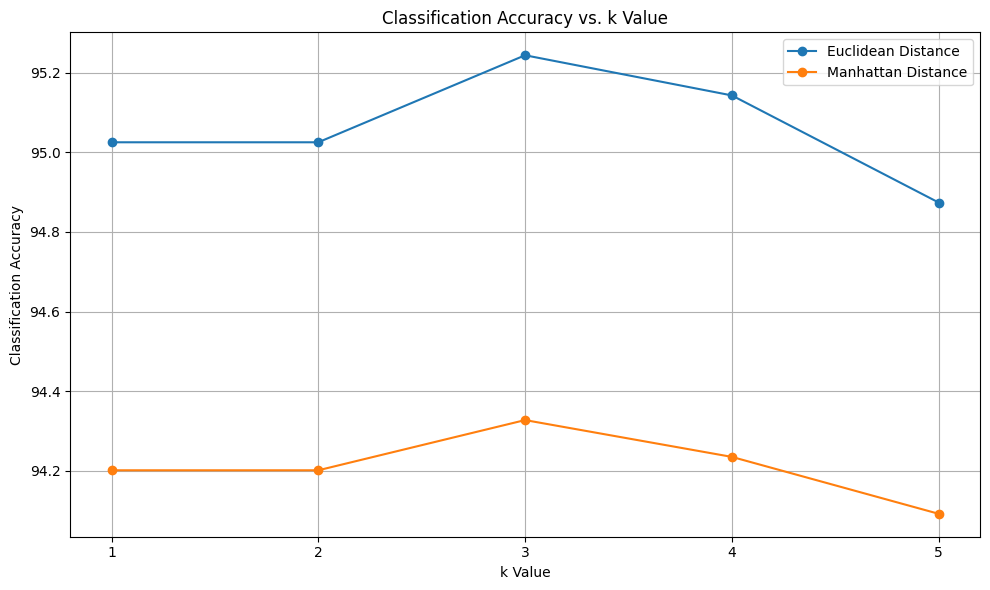

In [ ]:
## (3 marks)
# TODO: Plot a graph with k values on the x-axis and classification accuracy on the y-axis

k_values = np.arange(1, 6)  # k values from 1 to 5

# Create a single plot to compare the two versions
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_list_euclidean, marker='o', label='Euclidean Distance')
plt.plot(k_values, accuracy_list_manhattan, marker='o', label='Manhattan Distance')

plt.title('Classification Accuracy vs. k Value')
plt.xlabel('k Value')
plt.ylabel('Classification Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

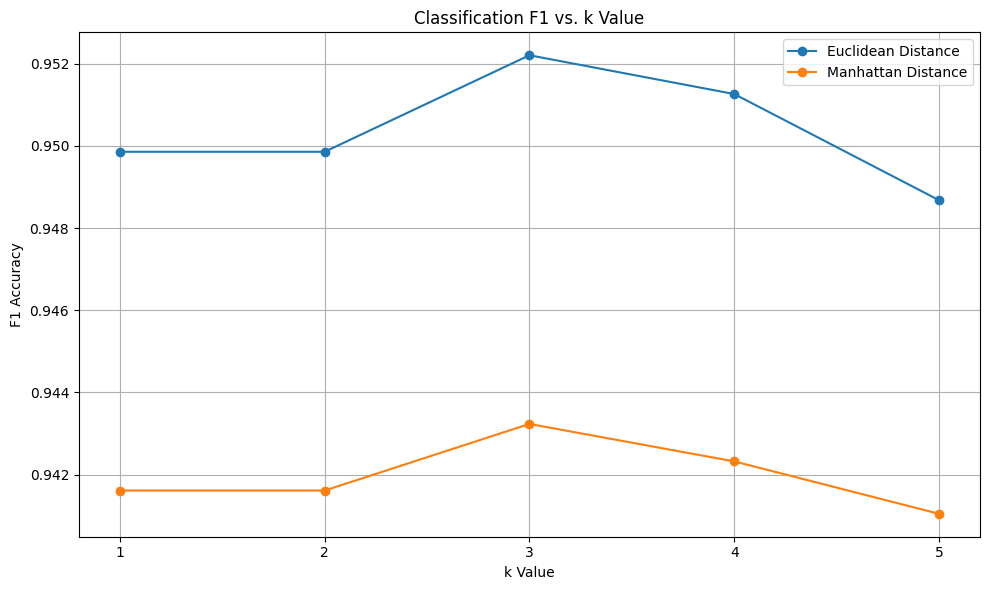

In [ ]:
## (3 marks)
# TODO: Plot a graph with k values on the x-axis and F1-score on the y-axis

k_values = np.arange(1, 6)  # k values from 1 to 5

# Create a single plot to compare the two versions
plt.figure(figsize=(10, 6))
plt.plot(k_values, macro_list_euclidean, marker='o', label='Euclidean Distance')
plt.plot(k_values, macro_list_manhattan, marker='o', label='Manhattan Distance')

plt.title('Classification F1 vs. k Value')
plt.xlabel('k Value')
plt.ylabel('F1 Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

Comment on the best value of k you have found for both distance metrics using
cross-validation. What impact does this value have on the decision boundries generated by the model and the stability of decisions?


In [ ]:
## (2 marks)
# TODO: Write your answer below as a comment

Finally, use the best value of `k` for both distance metrics and run it on the test dataset.

Find the confusion matrix, classification accuracy and F1 score and print them.

The confusion matrix must be displayed as a heatmap annotated with the data values. The axes should be properly labelled and the colormap used needs to be shown next to the heatmap.


In [ ]:
## (3 marks)
# TODO: Use the best value of k on test dataset (for both distance metrics).


# Code here

## **Part 2: Implement using Scikit-Learn (25 marks)**


In this part, you have to use [scikit-learn's k-NN implementation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to train and test your classifier on the dataset used in Part 1. Repeat the tasks you have done in Part 1 but this time using scikit-learn.

- Perform 5-fold cross-validation and run the k-NN classifier for values of `k = [1, 2, 3, 4, 5]` using both Euclidean and Manhattan distance.

- Use scikit-learn's [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to calculate the accuracy, the [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to calculate macro-average F1 score,
  and the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) function to calculate confusion matrix from the predicted labels.

- Present the results as a graph with k values on the x-axis and performance measures on the y-axis just like you did in Part 1. Use a single plot to compare the two versions of the classifier (one using Euclidean and the other using Manhattan distance metric).


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# (10 marks)
# TODO:  Perform 5-fold cross-validation.
# Code here

In [ ]:
# (5 marks)
# TODO: Plot a graph with k values on the x-axis and classifcation accuracy on the y-axis

In [ ]:
## (5 marks)
# TODO: Plot a graph with k values on the x-axis and F1-score on the y-axis

Finally, print the best values of k for both distance metrics. Then use these values of k on the test dataset and print the evaluation scores and confusion matrix (as a heatmap) for each of the distance metrics.


In [ ]:
## (5 marks)
# TODO: Use the best value of k on test dataset (for both distance metrics).

# Code here

# Testing the classifier with your own handwriting!

Gradio is an open-source Python library that is used to build machine learning and data science demos and web applications.

We can use the sketchpad interface to write our digits and pass that to our classifier. Try it out below!


In [ ]:
!pip install gradio
import gradio as gr

In [ ]:
#### Initialize your classifier here ####

#### Try this with out with your own classifiers

my_classifier = kNearestNeighbours(???)
my_classifier.fit(x_train,y_train)

my_sk_classifer = KNeighborsClassifier(n_neighbors=???,metric=???)
my_sk_classifer.fit(x_train,y_train)

In [ ]:
def sketch_recognition(img):
    image_arr = img.flatten()

    # label = my_classifier.predict([image_arr],EuclideanDistance)

    label = my_sk_classifer.predict([image_arr])

    print("Your label: ", label[0])
    return str(label[0])

In [ ]:
iface = gr.Interface(fn=sketch_recognition, inputs="sketchpad", outputs="text")
iface.launch(debug=True)

In [ ]:
### Draw and save your handwritten digits as an image (if you want)

gr.Interface(lambda x: x, "sketchpad", "image").launch()

In [ ]:
## (5 marks)
## TODO: Use images of your own handwritten digits and make a prediction using your own classifier.
## You can use the sketchpad above if you'd like or even use pencil and paper to write out some numbers and then take a picture.


## Display five of these images and print out the corresponding prediction
## You can use either your own classifier or sklearn.

## Have fun!!

## Fin.
